In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings('ignore')

### problem (a)

true value is -1-0.5773502691896254 and func value is -1.5773502691896253


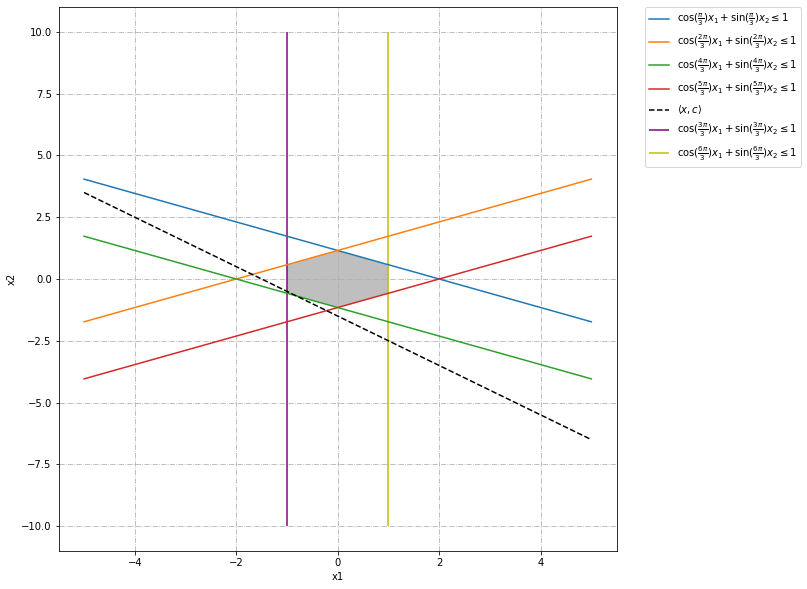

In [2]:
def func(x, i):
    return (1 - np.cos(np.pi * i / 3) * x ) / np.sin(np.pi * i / 3)

plt.figure(figsize=(10, 10))
x = np.linspace(-5,5,1000)

y1 = func(x, 1)
plt.plot(x, y1, label=r'$\cos(\frac{\pi}{3}) x_{1} + \sin(\frac{\pi}{3}) x_{2} \leq 1$')

y2 = func(x, 2)
plt.plot(x, y2, label=r'$\cos(\frac{2\pi}{3}) x_{1} + \sin(\frac{2\pi}{3}) x_{2} \leq 1$')

x3 = 1 / (np.cos(np.pi * 3 / 3))
plt.vlines(x3, -10, 10, 
           label=r'$\cos(\frac{3\pi}{3}) x_{1} + \sin(\frac{3\pi}{3}) x_{2} \leq 1$', color='purple')

y4 = func(x, 4)
plt.plot(x, y4, label=r'$\cos(\frac{4\pi}{3}) x_{1} + \sin(\frac{4\pi}{3}) x_{2} \leq 1$')

y5 = func(x, 5)
plt.plot(x, y5, label=r'$\cos(\frac{5\pi}{3}) x_{1} + \sin(\frac{5\pi}{3}) x_{2} \leq 1$')

x6 = 1 / (np.cos(np.pi * 6 / 3))
plt.vlines(x6, -10, 10, 
           label=r'$\cos(\frac{6\pi}{3}) x_{1} + \sin(\frac{6\pi}{3}) x_{2} \leq 1$', color='y')

y_1 = func(0, 1)
y_2 = func(1, 1)
y_3 = func(1, 5)
y_4 = func(0, 5)
y_5 = func(-1, 4)
y_6 = func(-1, 2)
plt.fill([0, 1, 1, 0, -1, -1 ,0], [y_1, y_2, y_3, y_4, y_5, y_6, y_1], 'grey', alpha=0.5)

plt.plot(x, [-i-1.5 for i in x], 'k--', label=r'$\langle x, c\rangle$')
plt.grid(True, linestyle='-.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('./p4_a.jpg')
print('true value is {}{} and func value is {}'.format(-1, y_5, -1+y_5))

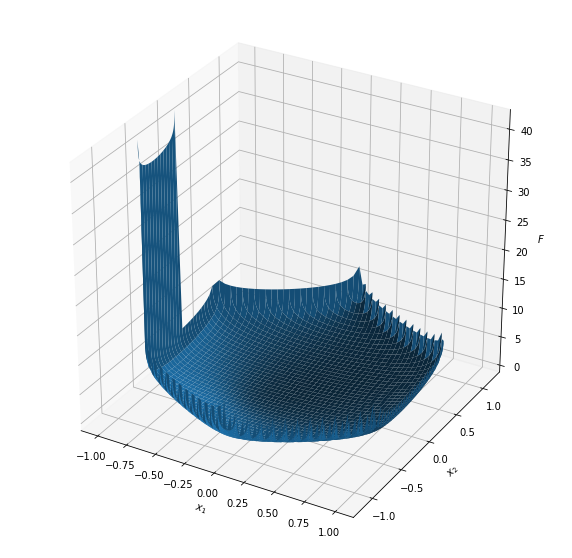

In [3]:
def objFunc2(x, y, tau):
    subpart = 0
    for i in range(6):
        subpart += np.log(1 - np.cos(i * np.pi / 3) * x - np.sin(i * np.pi / 3) * y)
    return x + y - 1 / tau * subpart

fig = plt.figure(figsize=(10,10))
ax3 = plt.axes(projection='3d')

X, Y = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(y_1, y_4, 1000))
Z = objFunc2(X, Y, tau=1)
ax3.plot_surface(X, Y, Z, linewidth=0, vmin=np.nanmin(Z), vmax=np.nanmax(Z), antialiased=True)
ax3.set_xlabel(r'$x_{1}$')
ax3.set_ylabel(r'$x_{2}$')
ax3.set_zlabel(r'$F$')
plt.savefig('./p4_b.jpg')

### problem (c)

In [4]:
def am(m):
    '''
    am(i): 2*1
    '''
    return np.mat([np.cos(np.pi * m / 3), np.sin(np.pi * m / 3)]).T

def objFunc(x, c=np.mat(np.ones((2,1))), tau=1, bm=1):
    '''
    x: 2*1
    '''
    subpart = 0
    for i in range(1, 7):
        subpart += np.log(bm - np.transpose(am(i)) @ x)
    return c.T @ x - (1 / tau) * subpart

def grad(x, tau, c=np.mat(np.ones((2,1))), bm=1):
    '''
    x: 2*1
    c: 2*1
    '''
    subpart = np.mat(np.zeros((2,1)))
    for i in range(1, 7):
        subpart += am(i) / (np.transpose(am(i)) @ x - bm)
    return c - (1/tau) * subpart 

def backtracking(xk, dk, tau, c=0.001, rho=0.8, alpha=1.0):
    '''
    Phi function, see notes
    '''
    def phi(alpha):
        return objFunc(xk + alpha * dk, tau=tau)
    '''
    h function, see notes
    '''
    def h(alpha):
        return objFunc(xk, tau=tau) + c * alpha * (dk.T @ dk)
    '''
    backtracking
    '''
    m = 0
    while phi(alpha) > h(alpha) or np.isnan(phi(alpha)[0, 0]):
        alpha = rho * alpha
        m += 1
    return alpha, m
    
def gradDescent(x, tau, alpha=0.001, maxiter=5000, delta=1e-3, bk=False):
    k = 0
    while (k < maxiter) and np.linalg.norm(grad(x, tau)) > delta:
        if bk:
            alpha, m = backtracking(x, -grad(x, tau), tau=tau, c=0.001, rho=0.8)
        x = x - alpha * grad(x, tau)
        print('k, grad, value is {}, {} and {}'.format(k+m, grad(x, tau).flatten(), objFunc(x, tau=tau)))
        k += 1
    return x, objFunc(x, tau=tau)

In [5]:
res = []
for tau in [1, 10, 100, 500, 1000]:
    x = np.mat(np.zeros((2,1)))
    print('current tau is {}'.format(tau))
    x, f = gradDescent(x, tau=tau, bk=True)
    res.append([x[:, 0].flatten(), f, tau])
    print('\n')

current tau is 1
k, grad, value is 3, [[-1.56272537 -1.70784221]] and [[-0.01252794]]
k, grad, value is 7, [[0.6895767  0.80496395]] and [[-0.14460729]]
k, grad, value is 6, [[-0.49719744 -0.55583788]] and [[-0.26103591]]
k, grad, value is 8, [[0.28385485 0.31530592]] and [[-0.28731291]]
k, grad, value is 8, [[-0.22736992 -0.24780183]] and [[-0.29874391]]
k, grad, value is 9, [[0.19400163 0.21054601]] and [[-0.30013391]]
k, grad, value is 10, [[-0.15734398 -0.16967974]] and [[-0.30454924]]
k, grad, value is 11, [[0.13325445 0.14367175]] and [[-0.30556194]]
k, grad, value is 12, [[-0.10905308 -0.11726307]] and [[-0.30738896]]
k, grad, value is 13, [[0.09192417 0.09890377]] and [[-0.307992]]
k, grad, value is 14, [[-0.07568077 -0.08131272]] and [[-0.30878267]]
k, grad, value is 15, [[0.06358356 0.06835815]] and [[-0.30911254]]
k, grad, value is 16, [[-0.05255429 -0.05645303]] and [[-0.30946555]]
k, grad, value is 17, [[0.0440487  0.04734019]] and [[-0.30963796]]
k, grad, value is 18, [[-

k, grad, value is 114, [[-0.00208779 -0.00303282]] and [[-1.10963752]]
k, grad, value is 115, [[0.00206101 0.00299413]] and [[-1.10963752]]
k, grad, value is 116, [[-0.00203448 -0.00295537]] and [[-1.10963754]]
k, grad, value is 117, [[0.00200837 0.00291766]] and [[-1.10963755]]
k, grad, value is 118, [[-0.00198252 -0.0028799 ]] and [[-1.10963756]]
k, grad, value is 119, [[0.00195709 0.00284315]] and [[-1.10963757]]
k, grad, value is 120, [[-0.0019319  -0.00280636]] and [[-1.10963758]]
k, grad, value is 121, [[0.00190711 0.00277055]] and [[-1.10963759]]
k, grad, value is 122, [[-0.00188257 -0.00273471]] and [[-1.1096376]]
k, grad, value is 123, [[0.00185841 0.0026998 ]] and [[-1.10963761]]
k, grad, value is 124, [[-0.0018345  -0.00266488]] and [[-1.10963762]]
k, grad, value is 125, [[0.00181096 0.00263087]] and [[-1.10963763]]
k, grad, value is 126, [[-0.00178766 -0.00259685]] and [[-1.10963764]]
k, grad, value is 127, [[0.00176473 0.00256369]] and [[-1.10963764]]
k, grad, value is 128

k, grad, value is 52, [[-0.54295066 -1.57957078]] and [[-1.44312278]]
k, grad, value is 58, [[0.56477863 0.33718497]] and [[-1.44431508]]
k, grad, value is 55, [[-0.10638786 -0.81973928]] and [[-1.44680598]]
k, grad, value is 58, [[0.52157629 0.267448  ]] and [[-1.44738831]]
k, grad, value is 57, [[-0.12224962 -0.84205916]] and [[-1.44913866]]
k, grad, value is 60, [[0.5256175 0.2794282]] and [[-1.449664]]
k, grad, value is 59, [[-0.12199745 -0.83609891]] and [[-1.45148928]]
k, grad, value is 62, [[0.52136206 0.2774998 ]] and [[-1.45201445]]
k, grad, value is 61, [[-0.12068861 -0.82786978]] and [[-1.45380296]]
k, grad, value is 64, [[0.51624615 0.27451793]] and [[-1.45433147]]
k, grad, value is 63, [[-0.11919528 -0.81882779]] and [[-1.45607383]]
k, grad, value is 66, [[0.51065495 0.27119736]] and [[-1.45660596]]
k, grad, value is 65, [[-0.11749965 -0.80888095]] and [[-1.45829886]]
k, grad, value is 68, [[0.50453016 0.26749713]] and [[-1.4588348]]
k, grad, value is 67, [[-0.1155687  -0.

k, grad, value is 71, [[0.60042783 0.32086639]] and [[-1.47250652]]
k, grad, value is 69, [[-0.25315109 -1.15743116]] and [[-1.47296606]]
k, grad, value is 73, [[0.6003247  0.32081169]] and [[-1.47309733]]
k, grad, value is 71, [[-0.25310786 -1.15723043]] and [[-1.47355663]]
k, grad, value is 75, [[0.60022018 0.32075606]] and [[-1.47368793]]
k, grad, value is 73, [[-0.25306379 -1.15702675]] and [[-1.474147]]
k, grad, value is 77, [[0.60011424 0.32069947]] and [[-1.47427833]]
k, grad, value is 75, [[-0.25301886 -1.15682003]] and [[-1.47473716]]
k, grad, value is 79, [[0.60000685 0.32064191]] and [[-1.47486852]]
k, grad, value is 77, [[-0.25297306 -1.15661023]] and [[-1.4753271]]
k, grad, value is 81, [[0.59989798 0.32058335]] and [[-1.47545851]]
k, grad, value is 79, [[-0.25292637 -1.15639728]] and [[-1.47591683]]
k, grad, value is 83, [[0.59978761 0.32052378]] and [[-1.47604827]]
k, grad, value is 81, [[-0.25287876 -1.15618111]] and [[-1.47650635]]
k, grad, value is 85, [[0.59967569 0.

k, grad, value is 199, [[-0.24729275 -1.13361005]] and [[-1.51076875]]
k, grad, value is 203, [[0.58837105 0.31371597]] and [[-1.51090455]]
k, grad, value is 201, [[-0.24711591 -1.1329393 ]] and [[-1.51133721]]
k, grad, value is 205, [[0.58804178 0.31350788]] and [[-1.51147314]]
k, grad, value is 203, [[-0.24693426 -1.13225185]] and [[-1.51190509]]
k, grad, value is 207, [[0.58770457 0.31329431]] and [[-1.51204116]]
k, grad, value is 205, [[-0.24674762 -1.13154708]] and [[-1.51247237]]
k, grad, value is 209, [[0.58735911 0.31307506]] and [[-1.51260858]]
k, grad, value is 207, [[-0.24655578 -1.13082434]] and [[-1.51303905]]
k, grad, value is 211, [[0.58700512 0.3128499 ]] and [[-1.5131754]]
k, grad, value is 209, [[-0.24635855 -1.13008297]] and [[-1.5136051]]
k, grad, value is 213, [[0.58664227 0.31261862]] and [[-1.5137416]]
k, grad, value is 211, [[-0.24615573 -1.12932226]] and [[-1.51417051]]
k, grad, value is 215, [[0.58627022 0.31238096]] and [[-1.51430716]]
k, grad, value is 213, 

k, grad, value is 317, [[-0.20919771 -1.00459864]] and [[-1.54247437]]
k, grad, value is 321, [[0.52742179 0.27049065]] and [[-1.54263188]]
k, grad, value is 319, [[-0.20686586 -0.99735074]] and [[-1.54294786]]
k, grad, value is 323, [[0.52410217 0.26790397]] and [[-1.54310629]]
k, grad, value is 321, [[-0.20433088 -0.98953806]] and [[-1.54341685]]
k, grad, value is 325, [[0.52053477 0.26509755]] and [[-1.54357621]]
k, grad, value is 323, [[-0.20156601 -0.98109371]] and [[-1.54388106]]
k, grad, value is 326, [[0.57463844 0.36218228]] and [[-1.54387935]]
k, grad, value is 325, [[-0.1758298  -0.93228842]] and [[-1.54439523]]
k, grad, value is 328, [[0.56029713 0.34163246]] and [[-1.54442254]]
k, grad, value is 327, [[-0.18997244 -0.952169  ]] and [[-1.544874]]
k, grad, value is 330, [[0.56315034 0.35099808]] and [[-1.54488712]]
k, grad, value is 329, [[-0.18146662 -0.93247692]] and [[-1.54536207]]
k, grad, value is 332, [[0.55573688 0.34306234]] and [[-1.54538517]]
k, grad, value is 331,

k, grad, value is 66, [[0.62897227 0.36216029]] and [[-1.46039331]]
k, grad, value is 64, [[-0.29863112 -1.24446972]] and [[-1.46066608]]
k, grad, value is 68, [[0.62901345 0.36225453]] and [[-1.46070254]]
k, grad, value is 66, [[-0.29851194 -1.24424023]] and [[-1.46097546]]
k, grad, value is 70, [[0.62895618 0.36217836]] and [[-1.46101198]]
k, grad, value is 68, [[-0.29858858 -1.24434982]] and [[-1.46128476]]
k, grad, value is 72, [[0.62896717 0.36222051]] and [[-1.46132124]]
k, grad, value is 70, [[-0.29852907 -1.24422347]] and [[-1.46159408]]
k, grad, value is 74, [[0.62893057 0.36218035]] and [[-1.46163059]]
k, grad, value is 72, [[-0.29856407 -1.2442607 ]] and [[-1.46190336]]
k, grad, value is 76, [[0.62892686 0.36219728]] and [[-1.46193985]]
k, grad, value is 74, [[-0.29853334 -1.24418398]] and [[-1.46221263]]
k, grad, value is 78, [[0.62890014 0.36217445]] and [[-1.46224914]]
k, grad, value is 76, [[-0.29854818 -1.24418607]] and [[-1.46252187]]
k, grad, value is 80, [[0.62888924

k, grad, value is 198, [[0.62764703 0.36166087]] and [[-1.48076485]]
k, grad, value is 196, [[-0.29820354 -1.24191991]] and [[-1.48103594]]
k, grad, value is 200, [[0.62762166 0.36164965]] and [[-1.4810727]]
k, grad, value is 198, [[-0.29819582 -1.24187355]] and [[-1.48134375]]
k, grad, value is 202, [[0.62759612 0.36163832]] and [[-1.48138051]]
k, grad, value is 200, [[-0.29818801 -1.24182683]] and [[-1.48165153]]
k, grad, value is 204, [[0.6275704 0.3616269]] and [[-1.4816883]]
k, grad, value is 202, [[-0.29818011 -1.24177976]] and [[-1.48195928]]
k, grad, value is 206, [[0.62754451 0.36161537]] and [[-1.48199606]]
k, grad, value is 204, [[-0.29817213 -1.24173232]] and [[-1.48226701]]
k, grad, value is 208, [[0.62751842 0.36160374]] and [[-1.48230379]]
k, grad, value is 206, [[-0.29816407 -1.24168453]] and [[-1.48257471]]
k, grad, value is 210, [[0.62749216 0.361592  ]] and [[-1.48261149]]
k, grad, value is 208, [[-0.29815592 -1.24163636]] and [[-1.48288237]]
k, grad, value is 212, [

k, grad, value is 316, [[0.62577246 0.36078302]] and [[-1.4988736]]
k, grad, value is 314, [[-0.29757045 -1.23843141]] and [[-1.49914223]]
k, grad, value is 318, [[0.62573232 0.36076338]] and [[-1.49917944]]
k, grad, value is 316, [[-0.29755581 -1.23835564]] and [[-1.49944801]]
k, grad, value is 320, [[0.62569183 0.36074355]] and [[-1.49948524]]
k, grad, value is 318, [[-0.29754102 -1.23827916]] and [[-1.49975376]]
k, grad, value is 322, [[0.62565098 0.36072351]] and [[-1.499791]]
k, grad, value is 320, [[-0.29752606 -1.23820196]] and [[-1.50005946]]
k, grad, value is 324, [[0.62560977 0.36070326]] and [[-1.50009671]]
k, grad, value is 322, [[-0.29751093 -1.23812404]] and [[-1.50036512]]
k, grad, value is 326, [[0.62556818 0.3606828 ]] and [[-1.50040238]]
k, grad, value is 324, [[-0.29749562 -1.23804539]] and [[-1.50067073]]
k, grad, value is 328, [[0.62552623 0.36066214]] and [[-1.500708]]
k, grad, value is 326, [[-0.29748015 -1.23796599]] and [[-1.5009763]]
k, grad, value is 330, [[0

k, grad, value is 434, [[0.62259241 0.35916391]] and [[-1.51683231]]
k, grad, value is 432, [[-0.29632975 -1.23234243]] and [[-1.51709678]]
k, grad, value is 436, [[0.62251926 0.35912553]] and [[-1.51713488]]
k, grad, value is 434, [[-0.29629975 -1.2322008 ]] and [[-1.51739926]]
k, grad, value is 438, [[0.62244523 0.35908666]] and [[-1.51743737]]
k, grad, value is 436, [[-0.29626934 -1.23205742]] and [[-1.51770165]]
k, grad, value is 440, [[0.62237032 0.35904728]] and [[-1.51773979]]
k, grad, value is 438, [[-0.29623852 -1.23191225]] and [[-1.51800398]]
k, grad, value is 442, [[0.62229449 0.35900738]] and [[-1.51804213]]
k, grad, value is 440, [[-0.29620727 -1.23176527]] and [[-1.51830622]]
k, grad, value is 444, [[0.62221774 0.35896696]] and [[-1.5183444]]
k, grad, value is 442, [[-0.29617559 -1.23161643]] and [[-1.51860839]]
k, grad, value is 446, [[0.62214005 0.358926  ]] and [[-1.51864659]]
k, grad, value is 444, [[-0.29614347 -1.23146571]] and [[-1.51891048]]
k, grad, value is 448

k, grad, value is 568, [[0.61452732 0.35477954]] and [[-1.53688377]]
k, grad, value is 566, [[-0.29282338 -1.21648803]] and [[-1.53713789]]
k, grad, value is 570, [[0.61432635 0.35466755]] and [[-1.53717836]]
k, grad, value is 568, [[-0.29273241 -1.21608829]] and [[-1.53743222]]
k, grad, value is 572, [[0.6141214  0.35455323]] and [[-1.53747276]]
k, grad, value is 570, [[-0.2926395  -1.21568044]] and [[-1.53772636]]
k, grad, value is 574, [[0.61391235 0.35443652]] and [[-1.53776696]]
k, grad, value is 572, [[-0.2925446  -1.21526424]] and [[-1.5380203]]
k, grad, value is 576, [[0.61369907 0.35431735]] and [[-1.53806096]]
k, grad, value is 574, [[-0.29244764 -1.21483942]] and [[-1.53831402]]
k, grad, value is 578, [[0.61348145 0.35419564]] and [[-1.53835475]]
k, grad, value is 576, [[-0.29234855 -1.21440573]] and [[-1.53860754]]
k, grad, value is 580, [[0.61325934 0.35407131]] and [[-1.53864833]]
k, grad, value is 578, [[-0.29224728 -1.21396289]] and [[-1.53890084]]
k, grad, value is 582

k, grad, value is 698, [[0.58012137 0.33458807]] and [[-1.55532847]]
k, grad, value is 696, [[-0.27586338 -1.14590724]] and [[-1.55554122]]
k, grad, value is 700, [[0.57870105 0.33371648]] and [[-1.55559161]]
k, grad, value is 698, [[-0.27511002 -1.14290957]] and [[-1.55580274]]
k, grad, value is 702, [[0.57720807 0.33279717]] and [[-1.55585352]]
k, grad, value is 700, [[-0.27431362 -1.13975163]] and [[-1.55606298]]
k, grad, value is 704, [[0.57563687 0.3318262 ]] and [[-1.55611416]]
k, grad, value is 702, [[-0.27347049 -1.13642061]] and [[-1.55632185]]
k, grad, value is 706, [[0.57398136 0.33079924]] and [[-1.55637345]]
k, grad, value is 704, [[-0.27257654 -1.13290234]] and [[-1.5565793]]
k, grad, value is 708, [[0.57223478 0.32971146]] and [[-1.55663134]]
k, grad, value is 706, [[-0.27162717 -1.12918112]] and [[-1.55683526]]
k, grad, value is 710, [[0.57038966 0.32855745]] and [[-1.55688776]]
k, grad, value is 708, [[-0.27061724 -1.12523944]] and [[-1.55708965]]
k, grad, value is 712

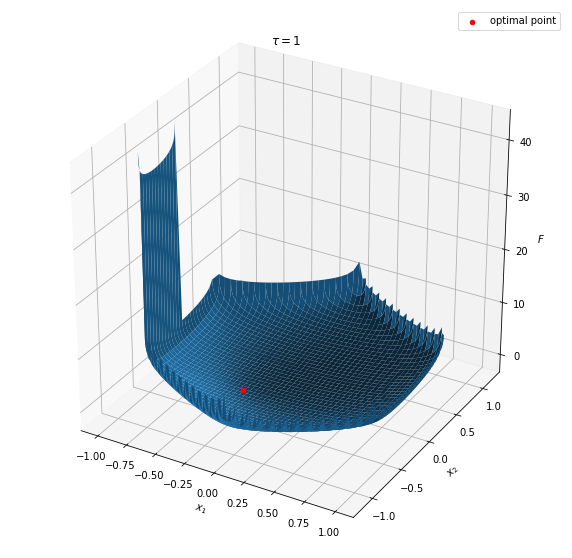

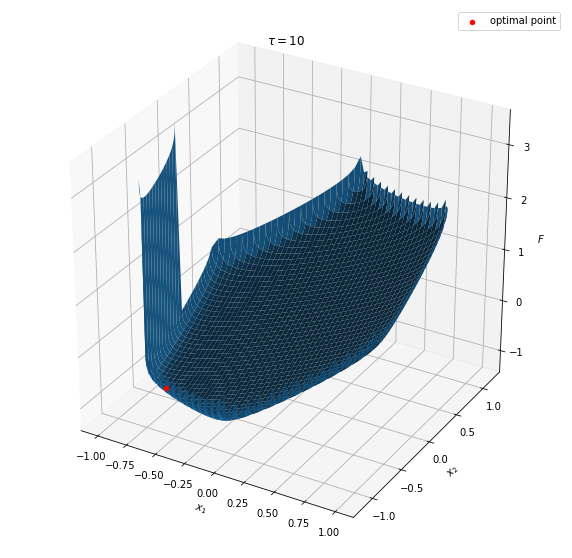

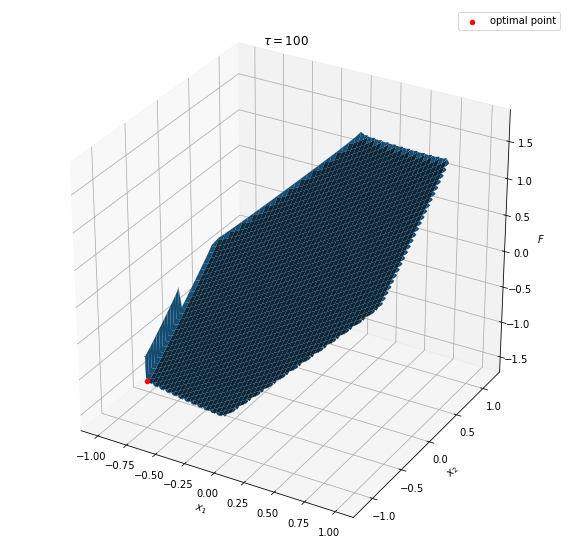

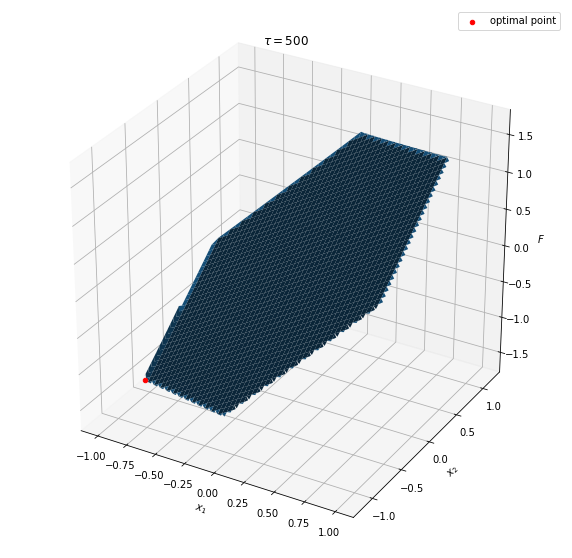

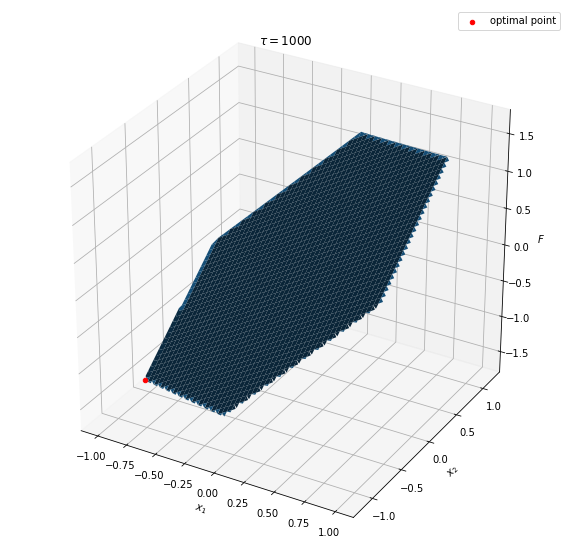

In [6]:
for mat in res:
    # draw \tau in 3D
    fig = plt.figure(figsize=(10,10))
    ax3 = plt.axes(projection='3d')

    X, Y = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(y_1, y_4, 1000))
    Z = objFunc2(X, Y, mat[2])
    ax3.plot_surface(X, Y, Z, linewidth=0, vmin=np.nanmin(Z), vmax=np.nanmax(Z), antialiased=True)
    ax3.scatter(mat[0][:,0], mat[0][:,1], mat[1], c='r', label='optimal point')
    ax3.set_xlabel(r'$x_{1}$')
    ax3.set_ylabel(r'$x_{2}$')
    ax3.set_zlabel(r'$F$')
    plt.title(r'$\tau={}$'.format(mat[2]))
    plt.legend()
    plt.savefig('./p4_c_tau{}.jpg'.format(mat[2]))

### Problem (d)

In [7]:
# initialize
x = np.mat(np.zeros((2,1)))
res = []
for tau in [1, 10, 100, 500, 1000]:
    print('current tau is {}'.format(tau))
    x, f = gradDescent(x, tau=tau, bk=True)
    print('\n')

current tau is 1
k, grad, value is 3, [[-1.56272537 -1.70784221]] and [[-0.01252794]]
k, grad, value is 7, [[0.6895767  0.80496395]] and [[-0.14460729]]
k, grad, value is 6, [[-0.49719744 -0.55583788]] and [[-0.26103591]]
k, grad, value is 8, [[0.28385485 0.31530592]] and [[-0.28731291]]
k, grad, value is 8, [[-0.22736992 -0.24780183]] and [[-0.29874391]]
k, grad, value is 9, [[0.19400163 0.21054601]] and [[-0.30013391]]
k, grad, value is 10, [[-0.15734398 -0.16967974]] and [[-0.30454924]]
k, grad, value is 11, [[0.13325445 0.14367175]] and [[-0.30556194]]
k, grad, value is 12, [[-0.10905308 -0.11726307]] and [[-0.30738896]]
k, grad, value is 13, [[0.09192417 0.09890377]] and [[-0.307992]]
k, grad, value is 14, [[-0.07568077 -0.08131272]] and [[-0.30878267]]
k, grad, value is 15, [[0.06358356 0.06835815]] and [[-0.30911254]]
k, grad, value is 16, [[-0.05255429 -0.05645303]] and [[-0.30946555]]
k, grad, value is 17, [[0.0440487  0.04734019]] and [[-0.30963796]]
k, grad, value is 18, [[-

k, grad, value is 112, [[-0.00205868 -0.00299052]] and [[-1.10963753]]
k, grad, value is 113, [[0.00203226 0.00295237]] and [[-1.10963754]]
k, grad, value is 114, [[-0.0020061  -0.00291415]] and [[-1.10963755]]
k, grad, value is 115, [[0.00198036 0.00287697]] and [[-1.10963756]]
k, grad, value is 116, [[-0.00195487 -0.00283974]] and [[-1.10963757]]
k, grad, value is 117, [[0.00192979 0.0028035 ]] and [[-1.10963758]]
k, grad, value is 118, [[-0.00190496 -0.00276723]] and [[-1.10963759]]
k, grad, value is 119, [[0.00188052 0.00273191]] and [[-1.1096376]]
k, grad, value is 120, [[-0.00185632 -0.00269658]] and [[-1.10963761]]
k, grad, value is 121, [[0.0018325  0.00266216]] and [[-1.10963762]]
k, grad, value is 122, [[-0.00180892 -0.00262773]] and [[-1.10963763]]
k, grad, value is 123, [[0.00178571 0.00259418]] and [[-1.10963764]]
k, grad, value is 124, [[-0.00176274 -0.00256064]] and [[-1.10963765]]
k, grad, value is 125, [[0.00174012 0.00252795]] and [[-1.10963765]]
k, grad, value is 126

k, grad, value is 50, [[0.42139382 0.28474181]] and [[-1.47969065]]
k, grad, value is 50, [[-0.09974252 -0.58325172]] and [[-1.48091098]]
k, grad, value is 52, [[0.39876265 0.2731989 ]] and [[-1.48097946]]
k, grad, value is 52, [[-0.09936253 -0.55031408]] and [[-1.4820344]]
k, grad, value is 54, [[0.37317263 0.25974197]] and [[-1.4821151]]
k, grad, value is 54, [[-0.09847798 -0.51303929]] and [[-1.48300016]]
k, grad, value is 56, [[0.34446688 0.24411003]] and [[-1.48309161]]
k, grad, value is 56, [[-0.0968326  -0.47128574]] and [[-1.48380722]]
k, grad, value is 58, [[0.31267604 0.2260909 ]] and [[-1.48390682]]
k, grad, value is 58, [[-0.09408856 -0.42523289]] and [[-1.48445986]]
k, grad, value is 60, [[0.27812241 0.20559091]] and [[-1.48456375]]
k, grad, value is 60, [[-0.08985219 -0.37552258]] and [[-1.48496854]]
k, grad, value is 62, [[0.24151324 0.18272925]] and [[-1.48507165]]
k, grad, value is 62, [[-0.08375602 -0.32335882]] and [[-1.48534967]]
k, grad, value is 64, [[0.20397552 0

k, grad, value is 41, [[-0.10765364 -0.24787733]] and [[-1.56361007]]
k, grad, value is 43, [[0.14484122 0.15646646]] and [[-1.56361153]]
k, grad, value is 43, [[-0.1109305  -0.22903374]] and [[-1.56361559]]
k, grad, value is 45, [[0.12904685 0.15021866]] and [[-1.56361707]]
k, grad, value is 45, [[-0.10834672 -0.20666634]] and [[-1.56361988]]
k, grad, value is 47, [[0.11318228 0.13963258]] and [[-1.56362162]]
k, grad, value is 47, [[-0.10215696 -0.18366855]] and [[-1.56362332]]
k, grad, value is 49, [[0.09831795 0.12699863]] and [[-1.56362527]]
k, grad, value is 49, [[-0.0939881  -0.16161698]] and [[-1.56362613]]
k, grad, value is 51, [[0.08491155 0.11374694]] and [[-1.56362812]]
k, grad, value is 51, [[-0.08493322 -0.14122305]] and [[-1.56362843]]
k, grad, value is 53, [[0.07305394 0.10070675]] and [[-1.56363032]]
k, grad, value is 54, [[-0.04091154 -0.06958066]] and [[-1.56363459]]
k, grad, value is 55, [[0.03588351 0.04800147]] and [[-1.56363538]]
k, grad, value is 56, [[-0.0203914